# Mounting Google Drive and Loading Data

In [1]:
# Mounting your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
# Change working directory

import os

os.chdir('/content/drive/My Drive/Colab Notebooks')

In [2]:
import pandas as pd

# Import your training and validation data
# Replace 'path_to_data' with the actual path of your data in Google Drive

# Corrected path to my data
data_path = '/content/drive/My Drive/Colab Notebooks'
training_features = pd.read_csv(f'{data_path}/features_train_basic.csv')
training_labels = pd.read_csv(f'{data_path}/label_train_basic.csv')
validation_features = pd.read_csv(f'{data_path}/features_validation_basic.csv')
validation_labels = pd.read_csv(f'{data_path}/label_validation_basic.csv')
test_features = pd.read_csv(f'{data_path}/features_test_basic.csv')
test_data_IDs = pd.read_csv(f'{data_path}/test_data_IDs_basic.csv')

# Defining the Neural Network

Now, let's define our neural network. We are using a Sequential model definition from Keras with batch normalization and dense layers.

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import InputLayer, Dense, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
  InputLayer(input_shape=(training_features.shape[1], )),
  BatchNormalization(),
  Dense(10, activation='relu'),
  Dense(4, activation='relu'),
  Dense(1)
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 15)                60        
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 10)                160       
                                                                 
 dense_1 (Dense)             (None, 4)                 44        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 269 (1.05 KB)
Trainable params: 239 (956.00 Byte)
Non-trainable params: 30 (120.00 Byte)
_________________________________________________________________


# Compiling and Training the Model

We will compile the model using Mean Squared Error (MSE) as the loss function and Adam optimizer. The model is then trained using the training data

In [4]:
model.compile(loss="mse", optimizer=Adam(learning_rate=0.001))

history = model.fit(training_features, training_labels, epochs=200,
                    validation_data=(validation_features, validation_labels))

Epoch 1/200
235/235 [==============================] - 2s 3ms/step - loss: 64286.3359 - val_loss: 51475.9102
Epoch 2/200
235/235 [==============================] - 0s 2ms/step - loss: 44339.0273 - val_loss: 15985.7852
Epoch 3/200
235/235 [==============================] - 0s 1ms/step - loss: 15080.7920 - val_loss: 9601.2754
Epoch 4/200
235/235 [==============================] - 0s 1ms/step - loss: 11397.7227 - val_loss: 8085.6318
Epoch 5/200
235/235 [==============================] - 0s 1ms/step - loss: 9975.0244 - val_loss: 7510.3652
Epoch 6/200
235/235 [==============================] - 0s 1ms/step - loss: 9160.9951 - val_loss: 7182.0903
Epoch 7/200
235/235 [==============================] - 0s 1ms/step - loss: 8561.6904 - val_loss: 6935.2217
Epoch 8/200
235/235 [==============================] - 0s 1ms/step - loss: 8332.9170 - val_loss: 6505.1816
Epoch 9/200
235/235 [==============================] - 0s 1ms/step - loss: 8060.5415 - val_loss: 6381.7349
Epoch 10/200
235/235 [=========

# Saving the Trained Model

# Plotting Training History

Visualizing the training and validation loss can help us understand the model's performance over time.

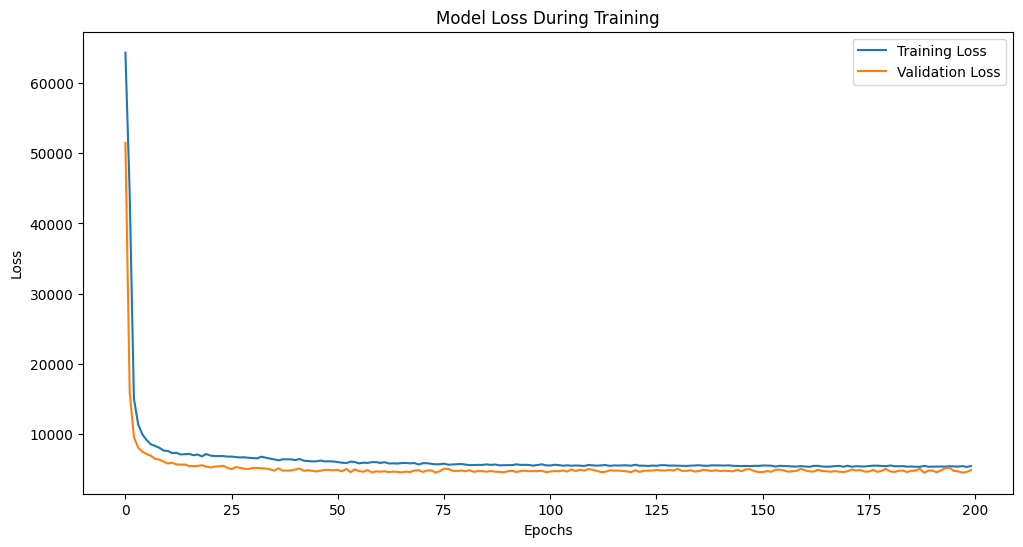

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Making Predictions and Evaluating the Model

Let's use the model to make predictions on our training and validation sets and evaluate the model's performance using Mean Absolute Percentage Error (MAPE).

In [6]:
import numpy as np

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    non_zero_mask = y_true != 0
    return np.mean(np.abs((y_true[non_zero_mask] - y_pred[non_zero_mask]) / y_true[non_zero_mask])) * 100

training_predictions = model.predict(training_features)
validation_predictions = model.predict(validation_features)
training_predictions
print(f"MAPE on the Training Data: {mape(training_labels, training_predictions):.2f}%")
print(f"MAPE on the Validation Data: {mape(validation_labels, validation_predictions):.2f}%")

58/58 [==============================] - 0s 1ms/step
MAPE on the Training Data: 26.35%
MAPE on the Validation Data: 29.10%


# Visualizing Predictions vs Actual Values

Visualizing the predicted versus actual values can provide insights into the model's accuracy

# Example of a Prediction and Export of Test Data for Kaggle

Finally, for testing data on Kaggle you have to do a prediction for the test data and format it in the format needed by Kaggle.

The code below provides an example that you can use

In [10]:
# Extract IDs and prepare test features
test_ids = test_data_IDs['id']

# Make predictions
test_predictions = model.predict(test_features)

# Create a DataFrame for submission
predictions_df = pd.DataFrame({
    'id': test_ids,
    'Umsatz': test_predictions.flatten()  # Replace column name with the one given in sample_submission.csv
})

# Export to CSV
predictions_df.to_csv('kaggle_submission_basic.csv', index=False)

58/58 [==============================] - 0s 827us/step
